In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx

In [1]:
!pip install contextily

  Created wheel for contextily: filename=contextily-0.99.0-py3-none-any.whl size=7594 sha256=8a9fd17f1c8129f6998ae0f3a70e83f301349ce8b635e218148b8e43bf78c5c1
  Stored in directory: /home/jovyan/.cache/pip/wheels/c3/6e/e2/8511ab7ba2ffd05a0a0366ca103de00a262ace5a23c70b4b18
Successfully built contextily


In [5]:
from owslib.wms import WebMapService
wms = WebMapService('http://mapservices.onemap.sg/mapproxy/service?REQUEST=GetCapabilities&SERVICE=WMTS', version='1.1.1')
wms.identification.title

'MapProxy WMS'

In [6]:
list(wms.contents)

['Default',
 'Original',
 'Grey',
 'Night',
 'singapore_3414_tms',
 'singapore_3414_wms',
 'singapore_3414_wmts',
 'singapore_landlot_wmts']

In [18]:
wms['Grey'].crsOptions

['EPSG:3414', 'EPSG:4326']

In [8]:
wms['Grey'].boundingBox

(103.359, 1.054, 104.766, 1.76, 'EPSG:4326')

In [23]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

In [23]:
xmin,xmax = 1000,54000
ymin,ymax = 14000,51000
ratio = (ymax-ymin)/(xmax-xmin)

img = wms.getmap(layers=['Grey'],
                 styles=[''],
                 srs='EPSG:3414',
                 bbox=[xmin,ymin,xmax,ymax],
                 size=[1000,int(1000*ratio)],
                 format='image/png',
                 transparent=True
                 )

In [24]:
with open('test.png','wb') as file:
    file.write(img.read())

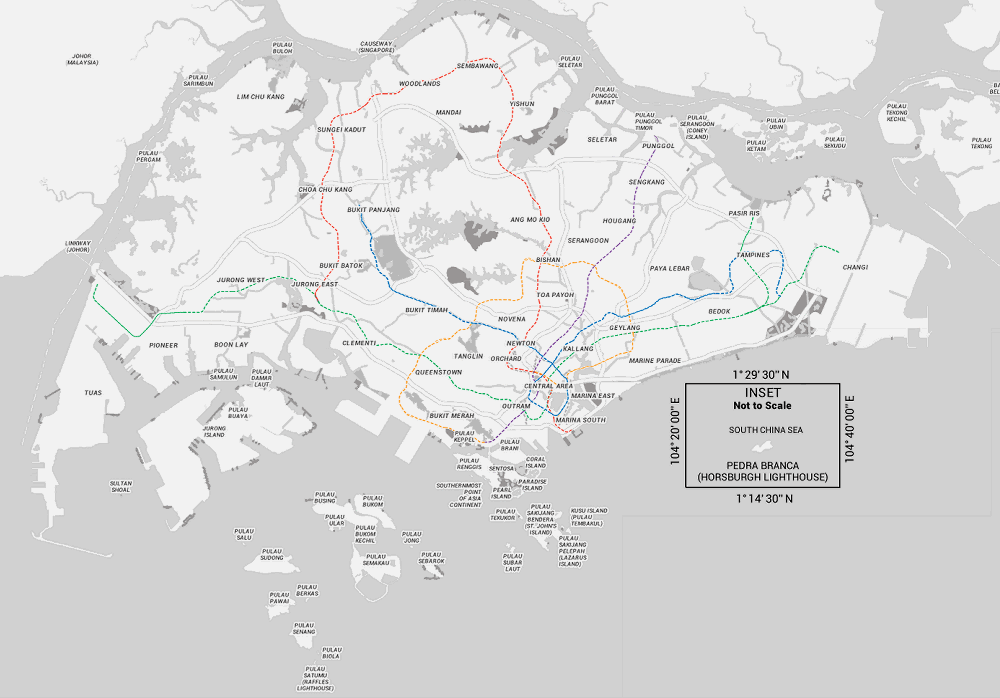

In [25]:
from IPython.display import Image
Image('test.png')

In [26]:
import numpy as np

def rgb2grey(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    grey = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return grey

In [5]:
import geopandas as gpd

sz = gpd.read_file('urasubzones.json') #.to_crs('EPSG:3414')

In [ ]:
ax 

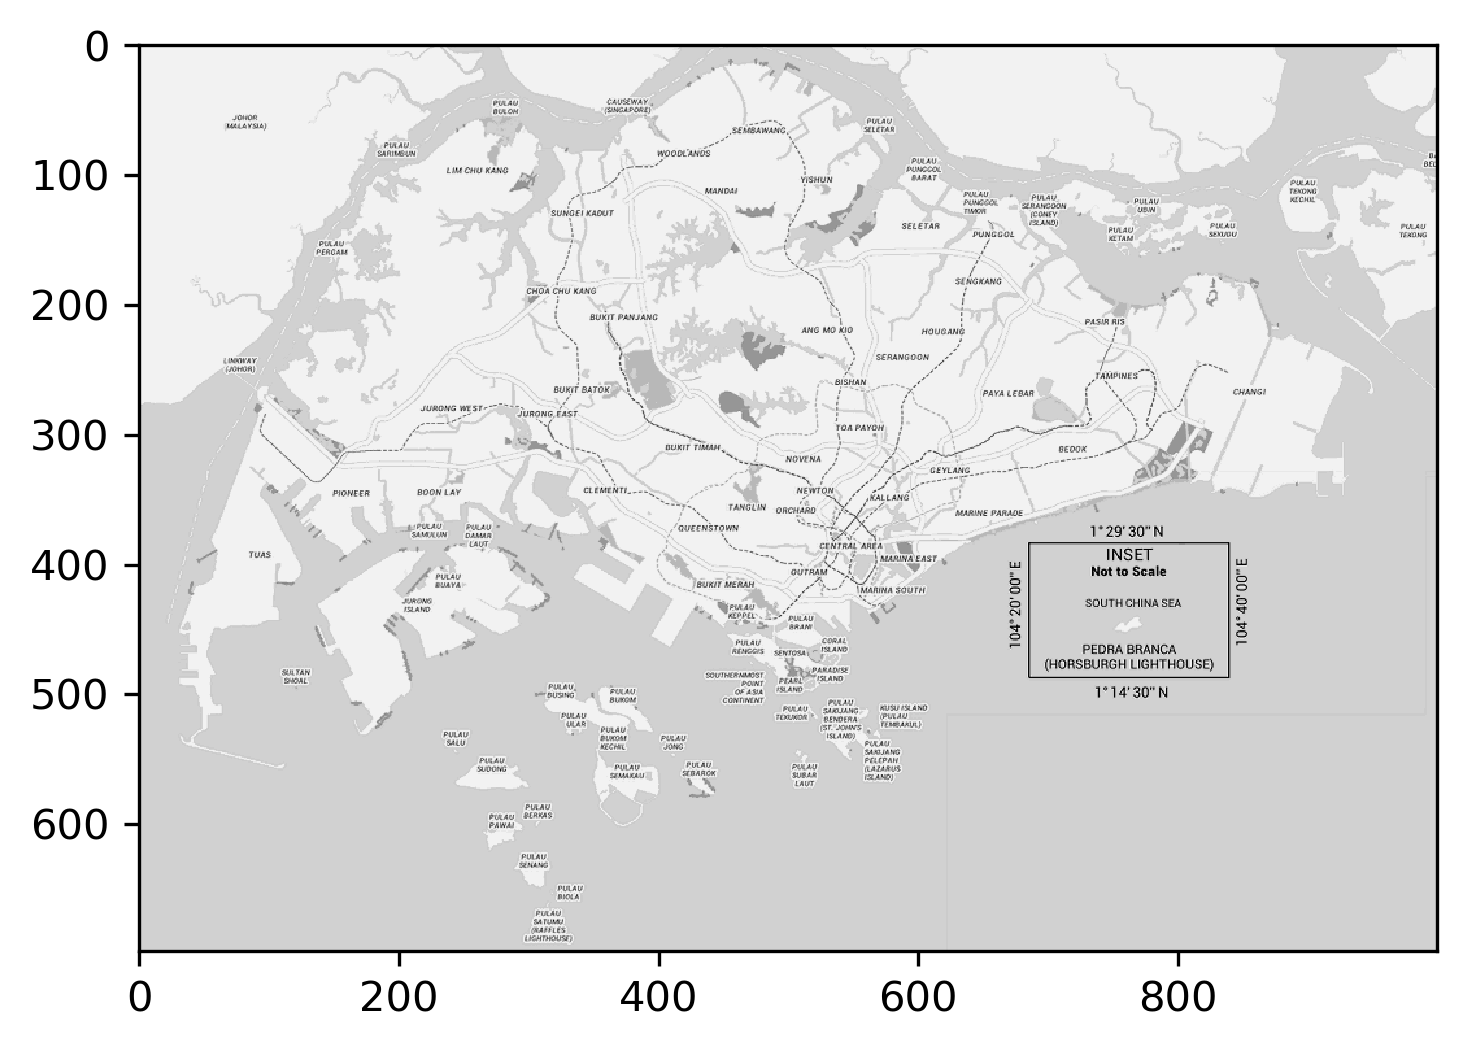

In [27]:
plt.figure(dpi=300)
data = rgb2grey(plt.imread('test.png'))
plt.imshow(data, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

ValueError: Failed to determine the required bounds in projection coordinates. Check that the values provided are within the valid range (x_limits=[919.0500208096164, 54342.24085297042], y_limits=[12576.274478921681, 50172.125956598175]).

ValueError: Failed to determine the required bounds in projection coordinates. Check that the values provided are within the valid range (x_limits=[919.0500208096164, 54342.24085297042], y_limits=[12576.274478921681, 50172.125956598175]).

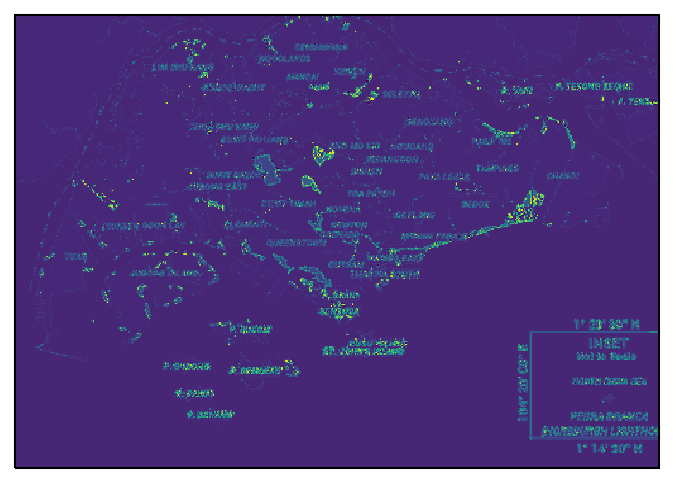

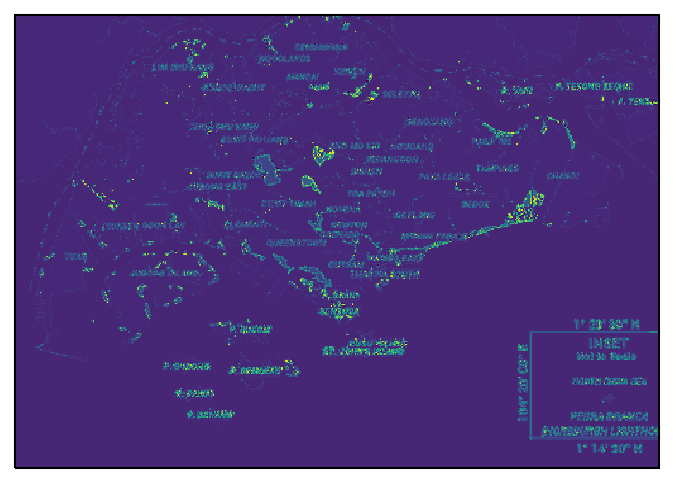

In [88]:
plt.figure(dpi=150)
ax = plt.axes(projection=ccrs.epsg(3414))
#ax.coastlines()
ax.add_wms(wms='http://mapservices.onemap.sg/mapproxy/service?REQUEST=GetCapabilities&SERVICE=WMTS',
               layers=['Default'])
ax.set_extent([1000,13000,54000,50000])
plt.show()

In [6]:
xmin, xmax = 1000, 54000
ymin, ymax = 13000, 50000

In [54]:
w, s, e, n = sz.total_bounds

In [ ]:
_ = ctx.howmany(w, s, e, n, 15, ll=True)

In [ ]:
%%time
img, ext = ctx.bounds2img(w, s, e, n, 15, ll=True)

/srv/conda/envs/notebook/lib/python3.8/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
plt.imshow(img, extent=ext)

InvalidLatitudeError: Y can not be computed for latitude 1.8166867428934608 radians

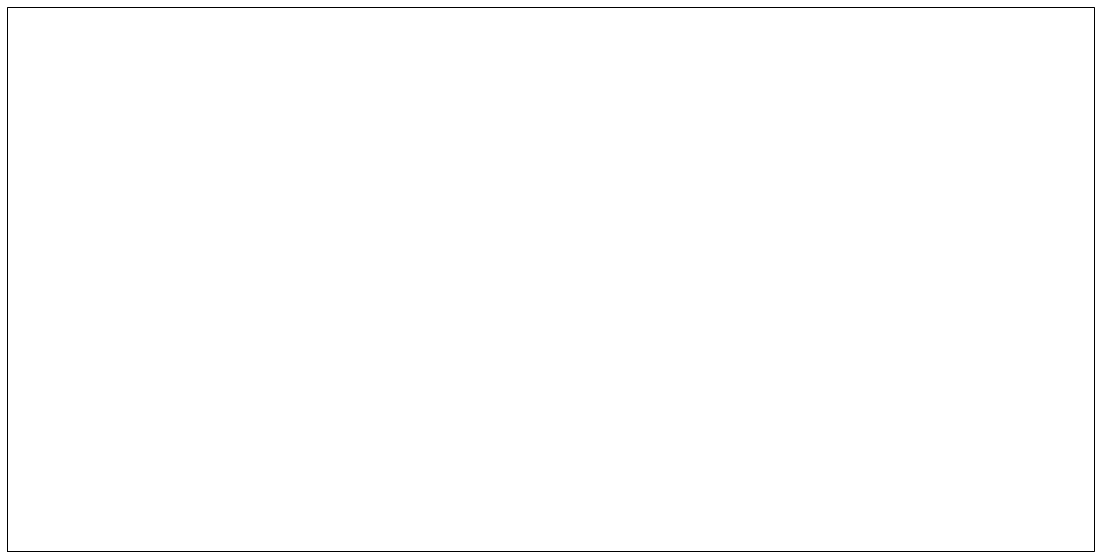

In [46]:
plt.figure(figsize=(25,10))
ax = plt.axes(projection=ccrs.PlateCarree()) #epsg(3414))
#sz.to_crs('EPSG:3414').plot(ax=ax, alpha=0.5, edgecolor='k')

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = sz.total_bounds #ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, ll=True, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

add_basemap(ax, zoom=12, url=getattr(ctx.sources, 'ST_WATERCOLOR'))
#add_basemap(ax, zoom=12, url='http://maps-b.onemap.sg/v2/Grey/tileZ/tileX/tileY.png')

In [44]:
getattr(ctx.sources, 'ST_WATERCOLOR')
sz.total_bounds

array([103.60570071,   1.1586987 , 104.08848307,   1.47077483])

In [24]:

sources = [i for i in dir(ctx.tile_providers) if i[0] != '_']
sources

['OSM_A',
 'OSM_B',
 'OSM_C',
 'ST_TERRAIN',
 'ST_TERRAIN_BACKGROUND',
 'ST_TERRAIN_LABELS',
 'ST_TERRAIN_LINES',
 'ST_TONER',
 'ST_TONER_BACKGROUND',
 'ST_TONER_HYBRID',
 'ST_TONER_LINES',
 'ST_TONER_LITE',
 'ST_WATERCOLOR']

HTTPError: HTTP Error 429: Too Many Requests

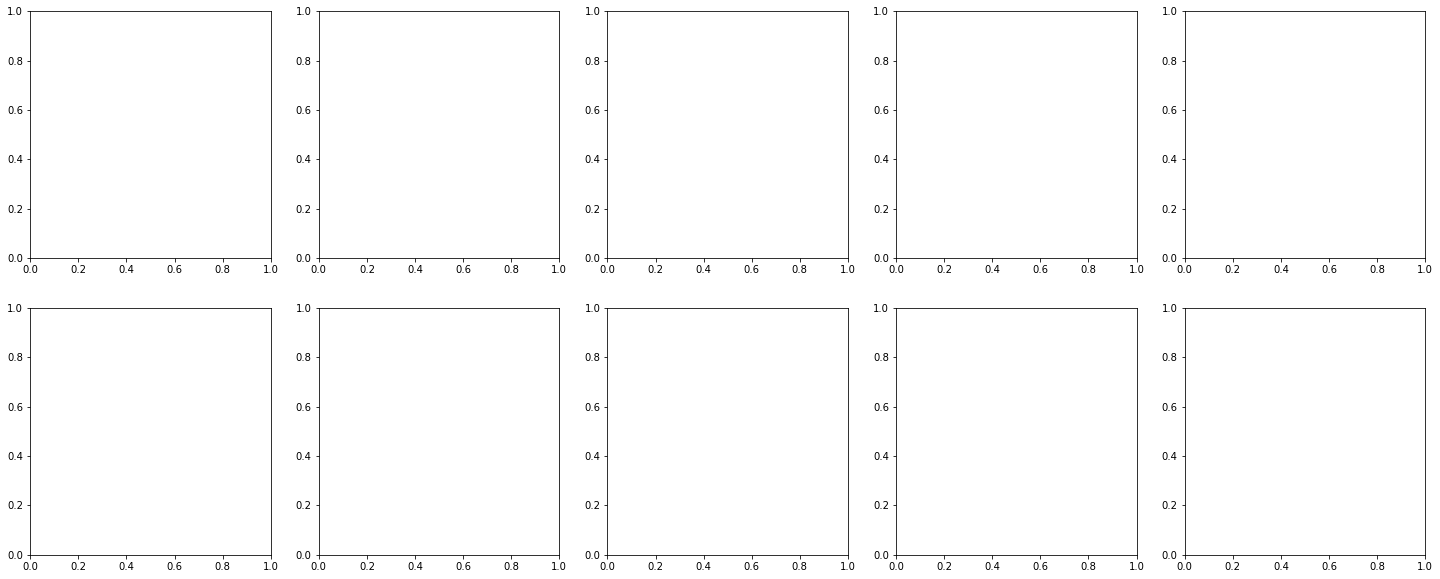

In [28]:
w, s, e, n = sz.total_bounds
f, axs = plt.subplots(2, 5, figsize=(25, 10))
axs = axs.flatten()
for src, ax in zip(sources, axs):
    img, ext = ctx.bounds2img(w, s, e, n, 6, url=getattr(ctx.sources, src), ll=True)
    ax.imshow(img, extent=ext)
    ax.set_title(src)
    ax.set_axis_off()
plt.show()